# Process Reddit comments

In [42]:
import csv
import datetime
import os
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [34]:
DATADIR = "../data/reddit/comments/"
DATEFORMAT = "%Y%m%d"
SUBREDDIT = "subreddit"
CREATED = "created"
ID = "id"
AUTHOR = "author"
BODY = "body"
PARENT = "parent"

In [23]:
def makeDateString(date):
    return(datetime.datetime.strftime(datetime.datetime.fromtimestamp(date),DATEFORMAT))

In [35]:
comments = []
files = sorted(os.listdir(DATADIR))
for inFileName in files:
    df = pd.read_csv(DATADIR+inFileName)
    for i in range(0,len(df)):
        comments.append((makeDateString(df.iloc[i][CREATED]),df.iloc[i][SUBREDDIT]+"_"+df.iloc[i][ID],df.iloc[i][PARENT],df.iloc[i][AUTHOR],None,df.iloc[i][BODY]))
len(comments)

12524

In [37]:
df = pd.DataFrame(comments)
groups = df.groupby(0).groups
dates = {f:len(groups[f]) for f in groups}

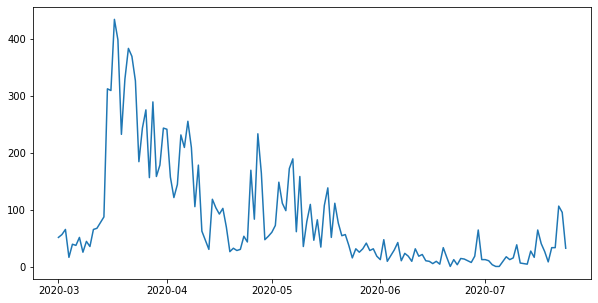

In [43]:
x = [datetime.datetime.strptime(d,DATEFORMAT) for d in dates]
y = [dates[d] for d in dates]

plt.figure(figsize=(10,5))
plt.plot_date(x,y,fmt="-")
plt.show()